<a href="https://colab.research.google.com/github/debrup416/Water-Quality-Monitoring-Using-Machine-Learning-And-Iot/blob/main/Water_Quality_Monitoring_Using_Machine_Learning_And_Iot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Collect Data
# Data Selection
# Data Visualization
# Data Cleaning
# Data Spliting
# Model Selection
# Model Evalution

# Data Selection

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Load Data

path="/content/water_potability.csv"
df=pd.read_csv(path)
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Quality
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,1
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,1
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,1
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,1
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,1
5,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,1
6,10.223862,248.071735,28749.71654,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,1
7,8.635849,203.361523,13672.09176,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,1
8,NaN,118.988579,14285.58385,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,1
9,11.180284,227.231469,25484.50849,9.077200,404.041635,563.885482,17.927806,71.976601,4.370562,1


In [5]:
df.shape

(3276, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Quality          3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Quality
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.872711
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.333348
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,1.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,1.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [8]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Quality              int64
dtype: object

In [9]:
cols=list(df.columns.values)
cols

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity',
 'Quality']

# Data Visualization

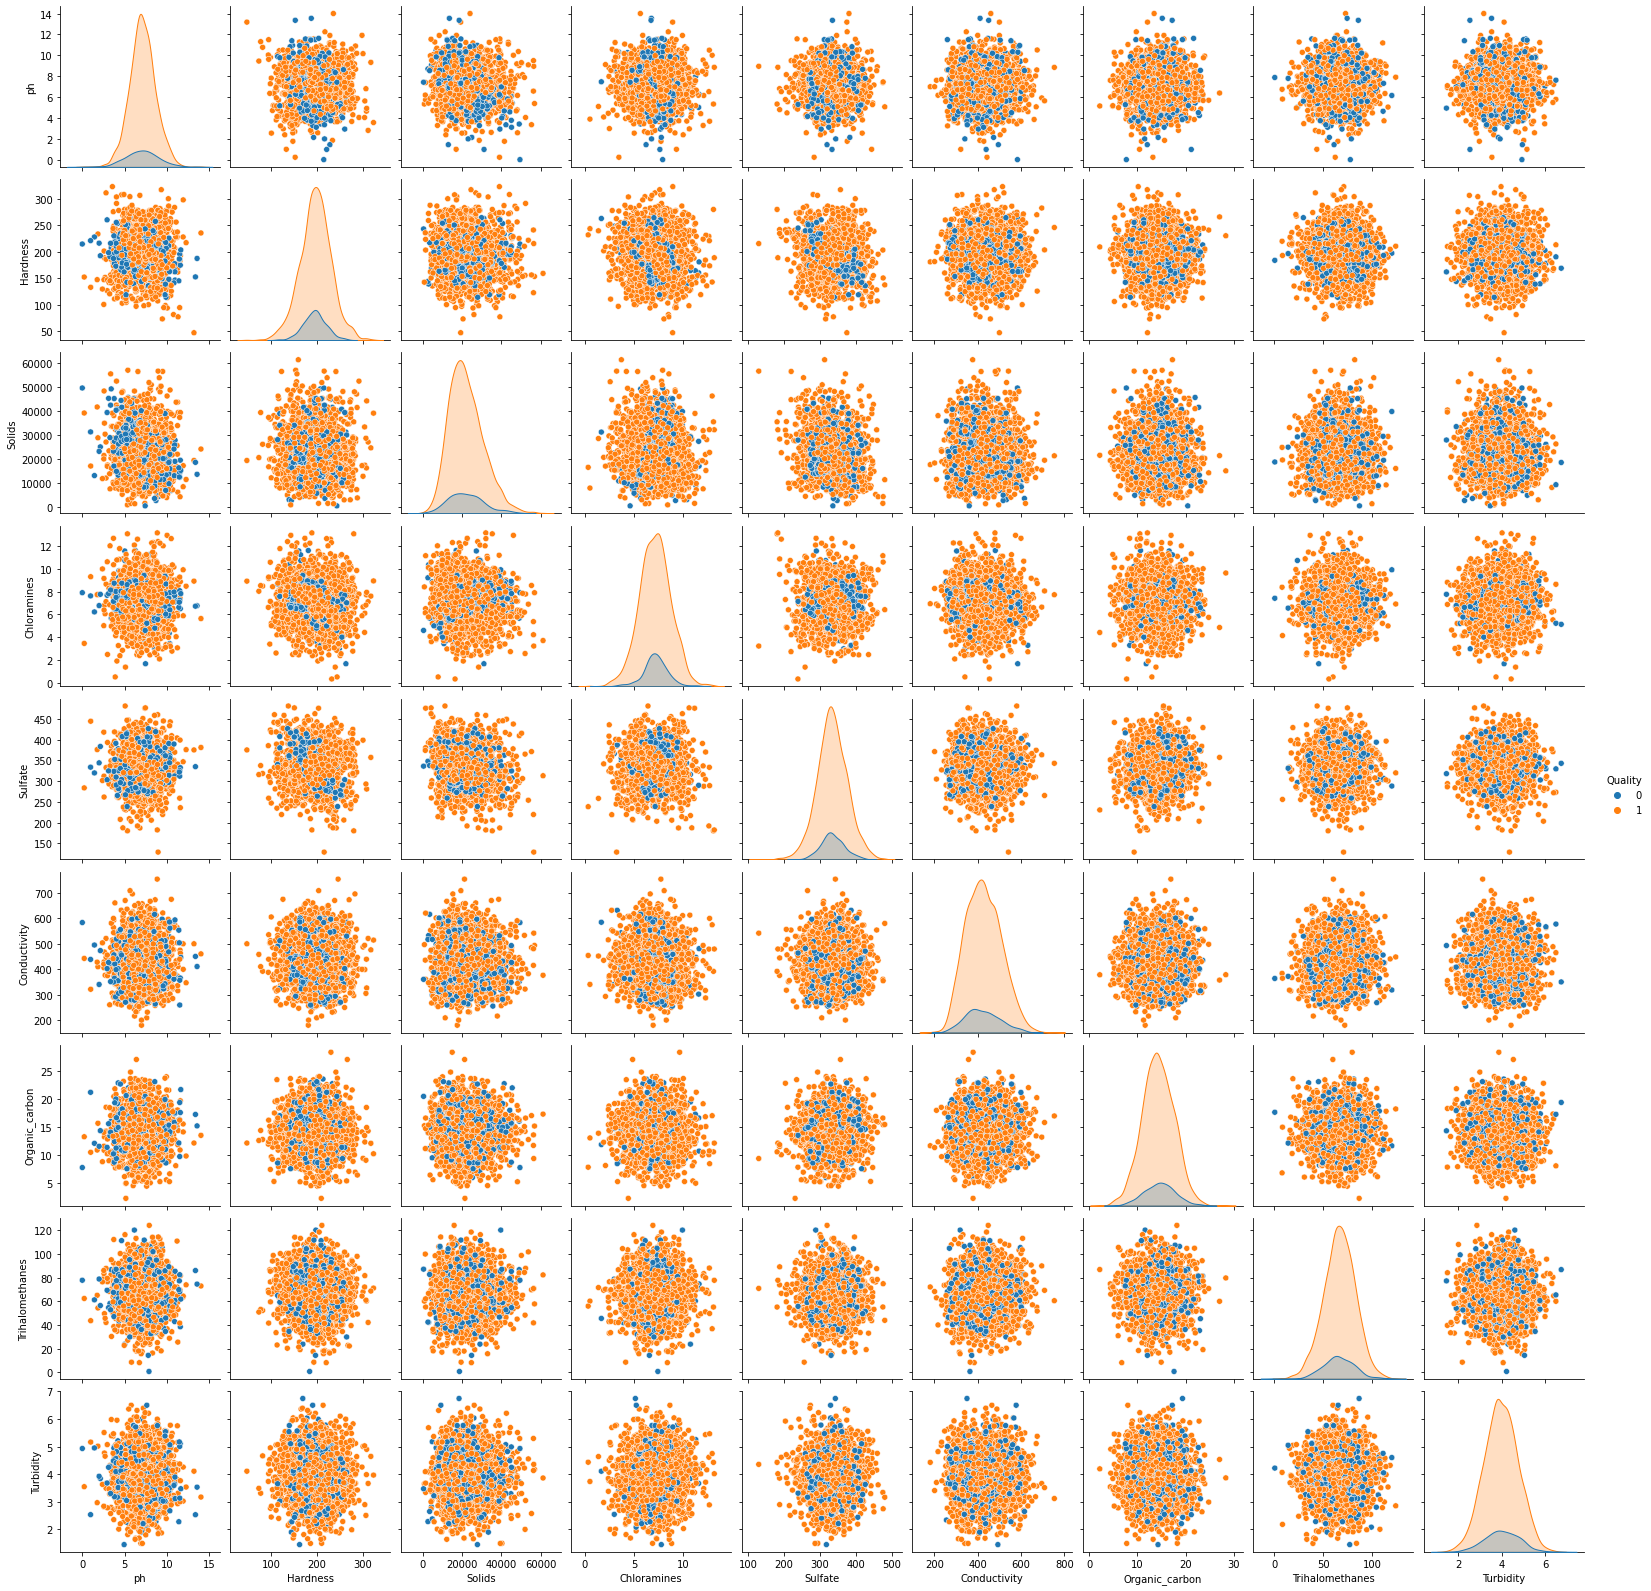

In [10]:
sns.pairplot(df,hue = 'Quality')

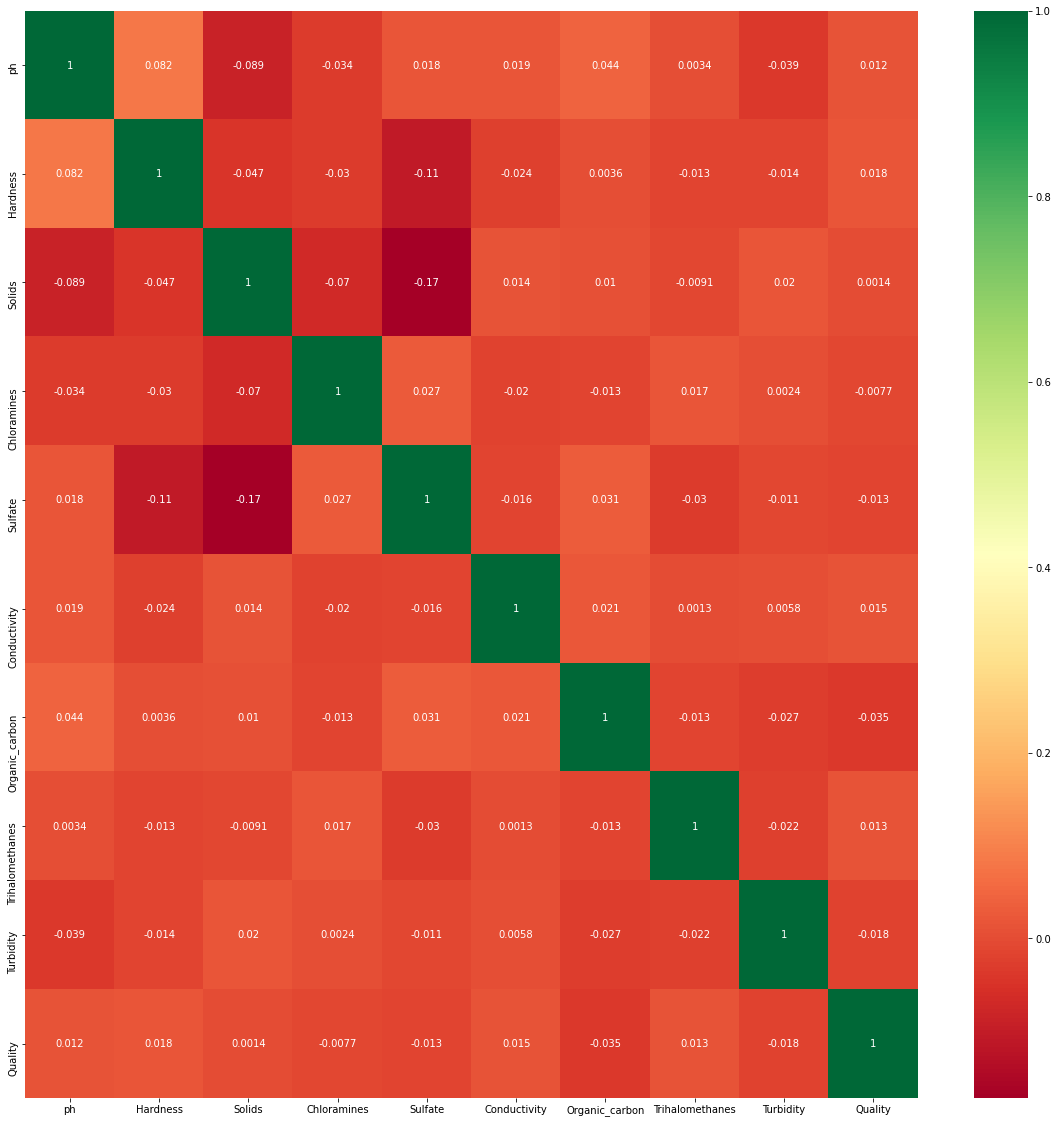

In [11]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

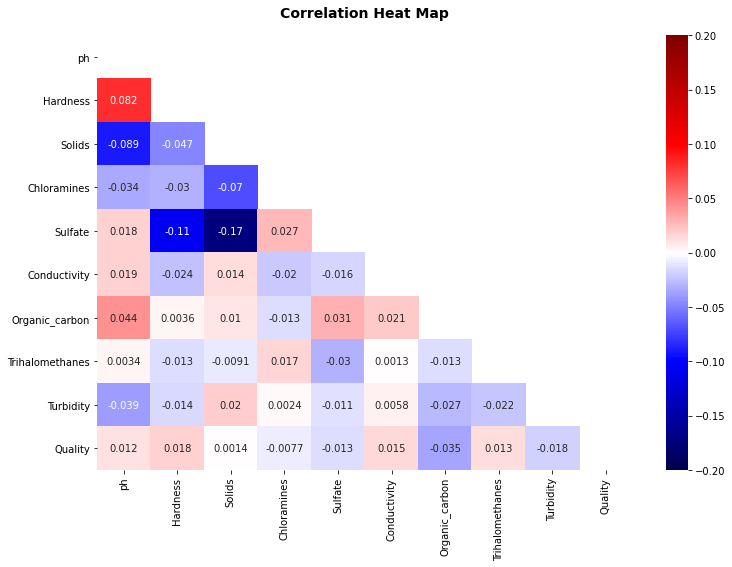

In [12]:
data = df.corr()    # Pairwise correlation with a null value is ignored
# Generate heat map using seaborn
fig, ax = plt.subplots(figsize=(12,8))                          # Create grid of empty subplots using matplotlib library                      
mask = np.triu(np.ones_like(data, dtype=bool))                   # Mask correlation matrix along its line of symmetry to remove redencency and correlation of a feature with itself
sns.heatmap(data, cmap='seismic', annot=True, mask=mask, ax=ax, vmin=-0.2, vmax=0.2)    # Create heat map useing seaborn library
fig.text(0.5, 1.05, 'Correlation Heat Map', horizontalalignment='center', verticalalignment='center', fontsize=14, fontweight='bold', transform=ax.transAxes)   # Add title
sns.set_style('white')  

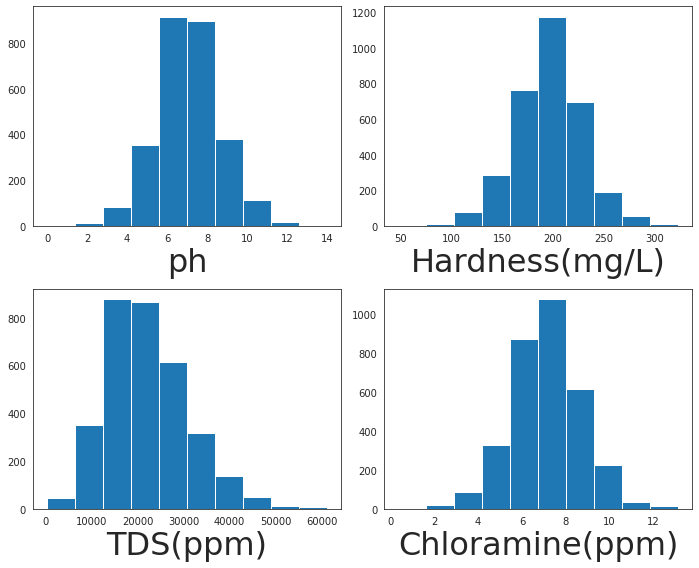

In [13]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(10,8))

ax1.hist(df["ph"])
ax1.set_xlabel("ph",fontsize=32)
ax2.hist(df["Hardness"])
ax2.set_xlabel("Hardness(mg/L)",fontsize=32)
ax3.hist(df["Solids"])
ax3.set_xlabel("TDS(ppm)",fontsize=32)
ax4.hist(df["Chloramines"])
ax4.set_xlabel("Chloramine(ppm)",fontsize=32)
plt.tight_layout()

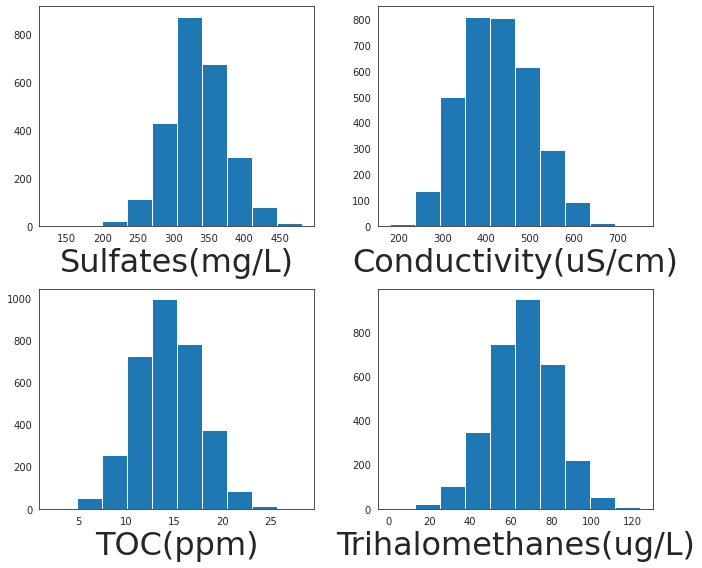

In [14]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(10,8))

ax1.hist(df["Sulfate"])
ax1.set_xlabel("Sulfates(mg/L)",fontsize=32)
ax2.hist(df["Conductivity"])
ax2.set_xlabel("Conductivity(uS/cm)",fontsize=32)
ax3.hist(df["Organic_carbon"])
ax3.set_xlabel("TOC(ppm)",fontsize=32)
ax4.hist(df["Trihalomethanes"])
ax4.set_xlabel("Trihalomethanes(ug/L)",fontsize=32)
plt.tight_layout()

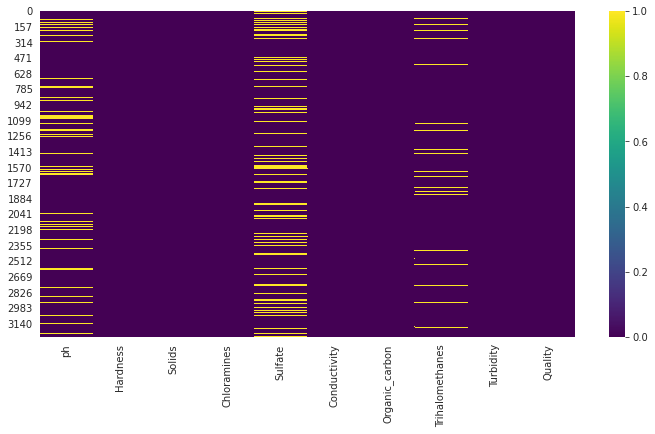

In [15]:
sns.heatmap(df.isnull(),cmap="viridis")
plt.gcf().set_size_inches(12,6)

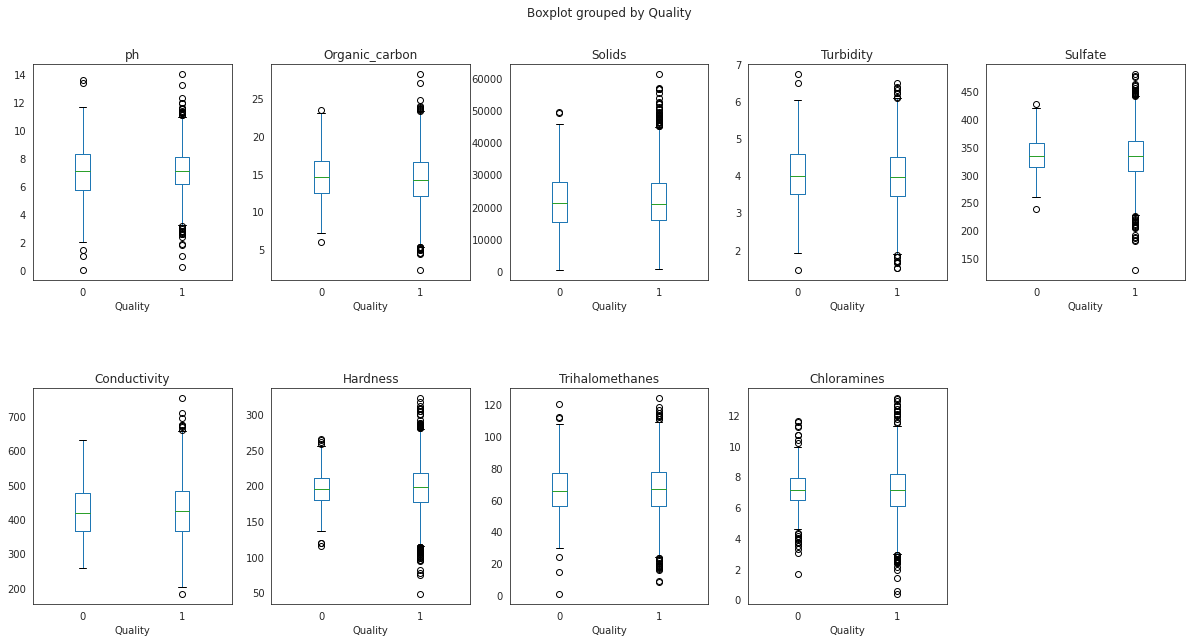

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,10))  # Create empty grid of subplots
fig.subplots_adjust(hspace=.5)                       # Adjust vertical/height spacing 

# Fill each subplot with the distribution of a feature separated by potability
a=0                               # Increment subplot coordinates
for feature in df.drop('Quality', axis=1):    # Iterate through features ('Potability' is a label) 
  df.boxplot(by='Quality', column=[feature], ax=axes[ a%2, a%5 ], grid=False)    # Create boxplots for each feature grouped by potable or not (df.boxplot() auto handles nan correctly). Subplot coordinates [a%2, a%5] start top left and vertically zig zag moving right.
  a+=1

axes[1,4].remove()        # Remove unnecessary subplot from 2x5 grid
plt.show()

# Data Cleaning


In [17]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Quality
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,0.012144
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,0.017763
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.001447
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,-0.007747
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.012773
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,0.014890
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.034958
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.012917
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,-0.017811
Quality,0.012144,0.017763,0.001447,-0.007747,-0.012773,0.014890,-0.034958,0.012917,-0.017811,1.000000


In [18]:
missing={"missing":df.isnull().sum()," % of missing":round(((df.isnull().sum()/df.shape[0])*100),2)}
pd.DataFrame(missing)

,missing,% of missing
ph,491,14.99
Hardness,0,0.00
Solids,0,0.00
Chloramines,0,0.00
Sulfate,781,23.84
Conductivity,0,0.00
Organic_carbon,0,0.00
Trihalomethanes,162,4.95
Turbidity,0,0.00
Quality,0,0.00


In [19]:
print("number of rows: ", df.shape[0])
print("number of column: ", df.shape[1])
df.Quality.value_counts()
df_notpotable  = df[df['Quality']==0]
df_potable = df[df['Quality']==1] 
df_notpotable.isnull().sum()
df_potable.isnull().sum()

number of rows:  3276
number of column:  10


ph                 430
Hardness             0
Solids               0
Chloramines          0
Sulfate            670
Conductivity         0
Organic_carbon       0
Trihalomethanes    144
Turbidity            0
Quality              0
dtype: int64

In [20]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan, strategy = 'mean')

#for df_notpotable
impute.fit(df_notpotable[['ph']])
impute.fit(df_notpotable[['Sulfate']])
impute.fit(df_notpotable[['Trihalomethanes']])
df_notpotable['ph'] = impute.transform(df_notpotable[['ph']])
df_notpotable['Sulfate'] = impute.transform(df_notpotable[['Sulfate']])
df_notpotable['Trihalomethanes'] = impute.transform(df_notpotable[['Trihalomethanes']])

#for df_potable
impute.fit(df_potable[['ph']])
impute.fit(df_potable[['Sulfate']])
impute.fit(df_potable[['Trihalomethanes']])

df_potable['ph'] = impute.transform(df_potable[['ph']])
df_potable['Sulfate'] = impute.transform(df_potable[['Sulfate']])
df_potable['Trihalomethanes'] = impute.transform(df_potable[['Trihalomethanes']])

In [21]:
df_notpotable.isnull().sum()
df.Quality.value_counts()
df = pd.concat([df_notpotable, df_potable])

In [22]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Quality            0
dtype: int64

In [23]:
Potability=df["Quality"].value_counts()
Potability

1    2859
0     417
Name: Quality, dtype: int64

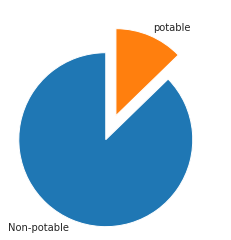

In [24]:
plt.pie(Potability,labels=["Non-potable","potable"],startangle=90,explode=[0.3,0])
plt.show()

# Data Spliting


In [25]:
df = df.sample(frac = 1)

In [26]:
y=df['Quality']

In [27]:
X=df.drop(['Quality'], axis=1)

In [28]:
# Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [29]:
select=model.feature_importances_
print(select)

[0.15601865 0.08961521 0.09307028 0.09751846 0.22161872 0.08358358
 0.08381426 0.08657869 0.08818215]


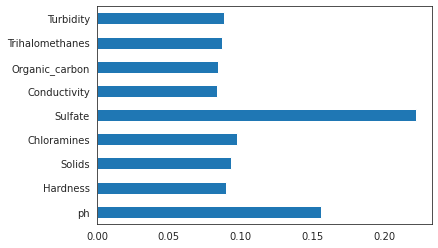

In [30]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')
plt.show()

In [31]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [32]:
from sklearn.preprocessing import MinMaxScaler
#Now, lets scale all the value in x within 0 to 1...
scaler = MinMaxScaler() # creating object of MinMaxScaler
scaler.fit(X)
X = scaler.transform(X)
X= pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8
0,0.088698,0.476061,0.280745,0.386705,0.001505,0.510970,0.545506,0.638747,0.677416
1,0.080765,0.737159,0.256997,0.474700,0.508938,0.268136,0.516642,0.351304,0.432574
2,0.090032,0.376975,0.325656,0.577009,0.503947,0.519094,0.605987,0.797677,0.437531
3,0.113008,0.642165,0.288552,0.648378,0.001505,0.508619,0.446298,0.599090,0.390585
4,0.076178,0.606101,0.340099,0.687500,0.001505,0.506584,0.426572,0.466131,0.694404
...,...,...,...,...,...,...,...,...,...
3271,0.133114,0.780459,0.395639,0.395069,0.422167,0.546239,0.423848,0.376231,0.858825
3272,1.000000,0.680370,0.058778,0.515595,0.532092,0.650528,0.659694,0.682366,0.495622
3273,0.118611,0.659470,0.351571,0.591083,0.600557,0.327506,0.361510,0.398065,0.601558
3274,0.099970,0.445561,0.379455,0.525602,0.001505,0.580355,0.692133,0.634120,0.514399


# Model Selection


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4c0d2e2d0>,
      dtype=object)

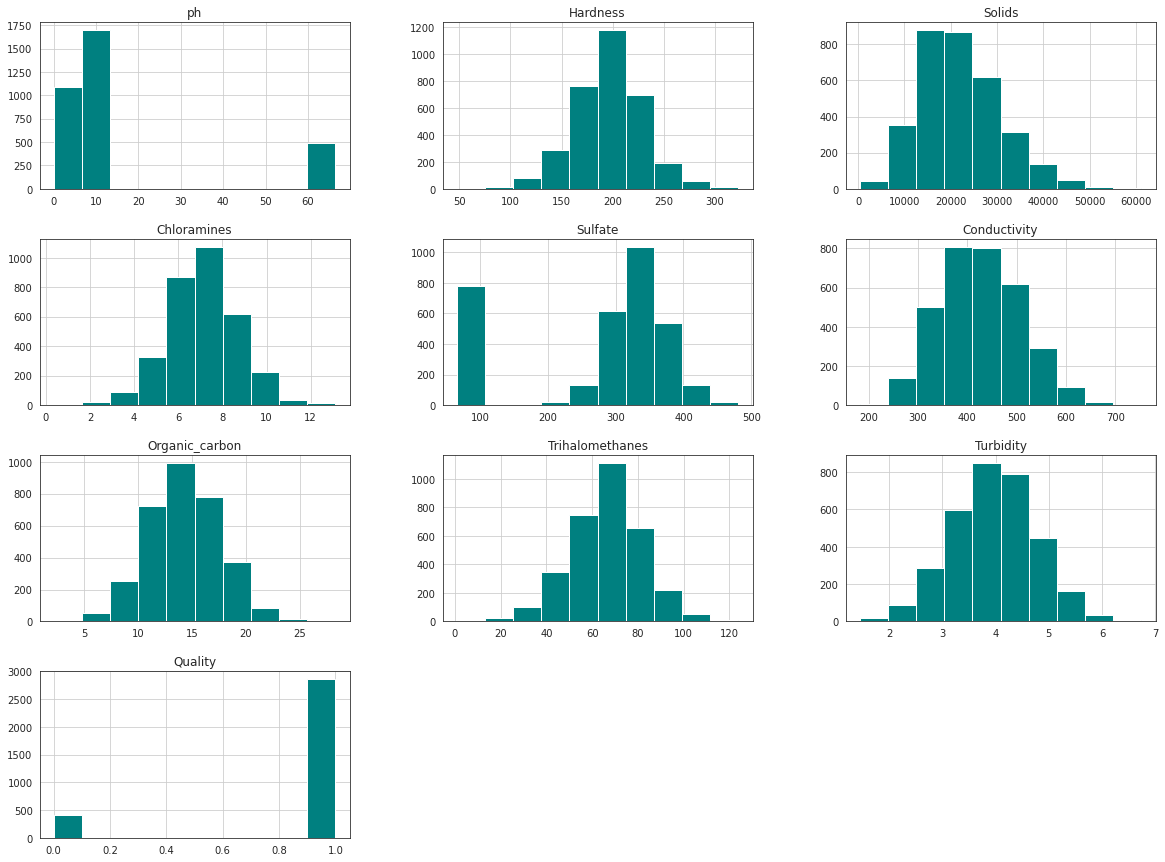

In [33]:
df.hist(bins=10, figsize=(20,15), color = 'teal')

In [34]:

#Create a function within many Machine Learning Models
def models(X_train,Y_train):
  
  #Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)
  
  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using SVC method of svm class to use Support Vector Machine Algorithm
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  #Using SVC method of svm class to use Kernel SVM Algorithm
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  
  #print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  
  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [35]:
model = models(X_train,y_train)

[0]Logistic Regression Training Accuracy: 0.8736641221374046
[1]K Nearest Neighbor Training Accuracy: 0.8790076335877862
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.8736641221374046
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.8736641221374046
[4]Gaussian Naive Bayes Training Accuracy: 0.8736641221374046
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.9969465648854962


# Model Evalution

In [36]:
from sklearn.metrics import confusion_matrix 
for i in range(len(model)):
   cm = confusion_matrix(y_test, model[i].predict(X_test)) 
   #extracting TN, FP, FN, TP
   TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(X_test)).ravel()
   print(cm)
   print('Model[{}] Testing Accuracy = "{} !"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
   print()# Print a new line

[[  0  86]
 [  0 570]]
Model[0] Testing Accuracy = "0.8689024390243902 !"

[[  2  84]
 [  9 561]]
Model[1] Testing Accuracy = "0.8582317073170732 !"

[[  0  86]
 [  3 567]]
Model[2] Testing Accuracy = "0.864329268292683 !"

[[  0  86]
 [  0 570]]
Model[3] Testing Accuracy = "0.8689024390243902 !"

[[  0  86]
 [  0 570]]
Model[4] Testing Accuracy = "0.8689024390243902 !"

[[ 46  40]
 [ 48 522]]
Model[5] Testing Accuracy = "0.8658536585365854 !"

[[ 36  50]
 [  7 563]]
Model[6] Testing Accuracy = "0.913109756097561 !"

